# Week 2 - Exploratory Data Analysis (EDA) Exercise

1. About the dataset:
* How many features (variables) do you have?
 * 44
* How many observations do you have? 
 * 9864
* What is the data type of each feature (categorical or continuous)? 
 * float64(12) continuous
 * int64(5) continuous
 * object(27) categorical
* From what you can infer about the features of your dataset, do the data types make sense? Do you need to change any? 
 * Dataset of features below should be changed to object
 * contracts_zip                                      float64 
 * membership_activedays_todate                       int64    
 * membership_activedays_todate_yr                    float64 
 * encounters_number_of_visits_rescheduled            float64
 * encounters_number_of_cancelled_visits              float64
* Is there any missing data? If so, describe what could be a possible approach(s) to handling the missing data.
 * Yes, some PSI outputs were NaN which may be due to null values. To determine null values, enter df.isnull(). See line 11
* Are the max/min values reasonable for the variables? Do you see any values that look like errors? 
 * Error maximum and minimum output from features below, *see lines 9-10*
   * membership_activedays_todate
   * membership_activedays_todate_yr
   * encounters_contracts_count
   * encounters_contract_number
   * encounters_total_number_of_doctors_visits
   * encounters_time_to_book_first_medical_visit
* Are there any features that could be re-coded? (for example., creating a new feature of age groups (0-18, 18-50, 51+)
 * contracts_zip can be re-coded to produce 5 series number instead of decimals
2. What are three research (business) questions that could be asked and answered using the features from this dataset? *see line 6-8* 
 * How many males/females? *line 6*
    FEMALE    7904
    MALE      1933
    OTHER       27
 * Average age of contracts. *line 7*
  * 39.244322789943226
 * Average amount of cancelled visits. *line 8*
  * 1.6678495386799148
3. Describe two to three additional types of features (hypothetical variables), that if added to this dataset, could help provide more value. Explain your rational.
  * Profile information (name, email, phone number, address)
  * Contracts specialty to determine what type of specialties are most likely to create a contract with the company.
  * Contract membership level (i.e. regular or premium) to assess the value of each level to see how the percentage of members changes in each level.

We will start by importing the requisite libraries:
* *Pandas* for Data Loading and Exploration
* *Matplotlib, Seaborn* for Visualization.

In [9]:
# import requisite libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#Load in the data from the web 
url = 'https://raw.githubusercontent.com/hantswilliams/AHI_506_Research/master/Week2/final_contracts_encounters.csv'
df = pd.read_csv(url, error_bad_lines=False)

In [7]:
#Contracts sex
df['contracts_biological_sex'].value_counts()

FEMALE    7904
MALE      1933
OTHER       27
Name: contracts_biological_sex, dtype: int64

In [8]:
#Mean of contracts_age
df.mean(axis=0)['contracts_age']

39.244322789943226

In [9]:
#Mean of encounters_number_of_cancelled_visits.1
df.mean(axis=0)['encounters_number_of_cancelled_visits.1']

1.6678495386799148

In [10]:
#Maximum values for each feature
df.max(axis=None, skipna=None, level=None, numeric_only=None)

contracts_center_id                                  ffcd5253-a397-40e5-b8a9-9f7a90c15714
contracts_center                                                Parsley Virtual Center WY
contracts_practice_location                                                West Hollywood
contracts_patient_id                                 fff4efb3-b44c-415c-ae10-b02d2762bc44
contracts_age                                                                          95
contracts_biological_sex                                                            OTHER
contracts_zip                                                                       99821
contracts_joined_practice_date                                                     9/9/19
contracts_contract_start_date                                                      9/9/20
contracts_computed_contract_end_date                                               9/9/21
contracts_last_day_membership                                                      9/9/21
contracts_

In [11]:
#Minimum values for each feature
df.min(axis=None, skipna=None, level=None, numeric_only=None)

contracts_center_id                                  14412bae-9efd-4e27-ac8b-5462723bea87
contracts_center                                                        Parsley Center LA
contracts_practice_location                                                      New York
contracts_patient_id                                 00008af8-193e-4931-ba6e-8f3ddedf5a3f
contracts_age                                                                           1
contracts_biological_sex                                                           FEMALE
contracts_zip                                                                           0
contracts_joined_practice_date                                                     1/1/17
contracts_contract_start_date                                                      1/1/17
contracts_computed_contract_end_date                                               1/1/19
contracts_last_day_membership                                                      1/1/19
contracts_

In [6]:
df.isnull()

,contracts_center_id,contracts_center,contracts_practice_location,contracts_patient_id,contracts_age,contracts_biological_sex,contracts_zip,contracts_joined_practice_date,contracts_contract_start_date,contracts_computed_contract_end_date,...,encounters_second_medical_visit_date_new_,encounters_third_medical_visit_date,encounters_last_medical_visit_date_new_,encounters_number_of_visits_rescheduled.1,encounters_number_of_cancelled_visits.1,psi_person_id_2,psi_completed_binary_group,PSI 1,PSI 2,PSI 3
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9859,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9860,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9861,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9862,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,True,False,True,True,True


In [6]:
#Lets look at the first 5 records 
df.head(5)

,contracts_center_id,contracts_center,contracts_practice_location,contracts_patient_id,contracts_age,contracts_biological_sex,contracts_zip,contracts_joined_practice_date,contracts_contract_start_date,contracts_computed_contract_end_date,...,encounters_second_medical_visit_date_new_,encounters_third_medical_visit_date,encounters_last_medical_visit_date_new_,encounters_number_of_visits_rescheduled.1,encounters_number_of_cancelled_visits.1,psi_person_id_2,psi_completed_binary_group,PSI 1,PSI 2,PSI 3
0,760ae573-24c3-4138-863d-1a60a92641ca,Parsley Center NYC,New York,00008af8-193e-4931-ba6e-8f3ddedf5a3f,48,MALE,10009.0,8/7/19,8/9/20,8/9/21,...,6/1/20,NaN,6/1/20,1.0,2.0,00008af8-193e-4931-ba6e-8f3ddedf5a3f,Completed,8/12/19,8/12/19,9/14/19
1,56ece908-227b-4541-b0fd-3e3b9707c32c,Parsley Center LA,West Hollywood,0009edd9-80c5-4ff2-a999-df34f77877e9,36,MALE,90008.0,2/27/19,2/27/19,8/13/19,...,5/23/19,NaN,5/23/19,0.0,1.0,0009edd9-80c5-4ff2-a999-df34f77877e9,Completed,3/1/19,4/2/19,5/22/19
2,760ae573-24c3-4138-863d-1a60a92641ca,Parsley Center NYC,New York,000a018a-357d-46a0-979f-d7fa46fe3d81,32,MALE,10003.0,8/12/16,8/12/20,8/11/21,...,10/12/16,12/7/16,4/10/18,0.0,0.0,NaN,Not Completed,NaN,NaN,NaN
3,760ae573-24c3-4138-863d-1a60a92641ca,Parsley Center NYC,New York,000dd2b8-08a8-4817-a854-16ea0285867c,40,FEMALE,10028.0,4/9/19,4/9/20,4/9/21,...,NaN,NaN,4/16/19,0.0,0.0,000dd2b8-08a8-4817-a854-16ea0285867c,Completed,4/9/19,NaN,NaN
4,760ae573-24c3-4138-863d-1a60a92641ca,Parsley Center NYC,New York,0018bd49-3edf-4a0d-b3f7-07f2549ba197,28,FEMALE,10310.0,6/12/19,8/14/20,8/14/21,...,9/17/19,2/21/20,6/2/20,5.0,7.0,0018bd49-3edf-4a0d-b3f7-07f2549ba197,Completed,6/22/19,7/15/19,9/16/19


In [7]:
#Lets look at the bottom 5 records 
df.tail(5)

,contracts_center_id,contracts_center,contracts_practice_location,contracts_patient_id,contracts_age,contracts_biological_sex,contracts_zip,contracts_joined_practice_date,contracts_contract_start_date,contracts_computed_contract_end_date,...,encounters_second_medical_visit_date_new_,encounters_third_medical_visit_date,encounters_last_medical_visit_date_new_,encounters_number_of_visits_rescheduled.1,encounters_number_of_cancelled_visits.1,psi_person_id_2,psi_completed_binary_group,PSI 1,PSI 2,PSI 3
9859,56ece908-227b-4541-b0fd-3e3b9707c32c,Parsley Center LA,West Hollywood,ffec6262-b899-456f-8c3e-c516fa9468aa,36,MALE,90094.0,1/25/18,1/25/18,1/25/19,...,3/23/18,5/21/18,5/21/18,0.0,0.0,ffec6262-b899-456f-8c3e-c516fa9468aa,Completed,3/22/18,5/21/18,NaN
9860,760ae573-24c3-4138-863d-1a60a92641ca,Parsley Center NYC,New York,ffee41f8-e474-41ff-ba21-330f212951b3,55,FEMALE,10025.0,5/15/18,7/15/19,7/15/19,...,9/20/18,11/13/18,6/28/19,0.0,0.0,ffee41f8-e474-41ff-ba21-330f212951b3,Completed,5/15/18,9/17/18,11/13/18
9861,760ae573-24c3-4138-863d-1a60a92641ca,Parsley Center NYC,New York,fff43a36-fcef-4f2e-abb7-ca9b8db6ea1a,53,FEMALE,12508.0,4/19/17,2/11/20,2/10/21,...,7/10/17,3/5/18,4/17/20,1.0,0.0,fff43a36-fcef-4f2e-abb7-ca9b8db6ea1a,Completed,3/4/18,2/12/19,3/31/19
9862,760ae573-24c3-4138-863d-1a60a92641ca,Parsley Center NYC,New York,fff4efb3-b44c-415c-ae10-b02d2762bc44,47,FEMALE,19115.0,7/18/19,10/1/20,10/1/21,...,NaN,NaN,11/7/19,0.0,1.0,NaN,Not Completed,NaN,NaN,NaN
9863,99c24117-7a43-4dc0-b9c6-e03aed9316b4,Parsley Center SF,San Francisco,ffe83772-9074-4955-87c8-c334413dcdb9,70,MALE,94107.0,11/27/17,11/27/17,11/27/18,...,NaN,NaN,NaN,NaN,NaN,NaN,Not Completed,NaN,NaN,NaN


In [8]:
#Lets look at a random selection of 5 records 
df.sample(5)

,contracts_center_id,contracts_center,contracts_practice_location,contracts_patient_id,contracts_age,contracts_biological_sex,contracts_zip,contracts_joined_practice_date,contracts_contract_start_date,contracts_computed_contract_end_date,...,encounters_second_medical_visit_date_new_,encounters_third_medical_visit_date,encounters_last_medical_visit_date_new_,encounters_number_of_visits_rescheduled.1,encounters_number_of_cancelled_visits.1,psi_person_id_2,psi_completed_binary_group,PSI 1,PSI 2,PSI 3
3613,760ae573-24c3-4138-863d-1a60a92641ca,Parsley Center NYC,New York,5de45675-e98e-47d7-819a-7923f386f88e,38,FEMALE,NaN,10/6/16,10/6/16,10/6/17,...,12/5/16,5/24/17,10/5/17,0.0,0.0,NaN,Not Completed,NaN,NaN,NaN
3051,760ae573-24c3-4138-863d-1a60a92641ca,Parsley Center NYC,New York,4f351788-ef6c-41aa-94d6-ac9a96aa1dc3,29,FEMALE,11201.0,10/2/17,10/2/20,10/1/21,...,1/16/18,4/10/18,3/27/20,0.0,0.0,4f351788-ef6c-41aa-94d6-ac9a96aa1dc3,Completed,1/13/18,5/18/18,4/5/19
5891,56ece908-227b-4541-b0fd-3e3b9707c32c,Parsley Center LA,West Hollywood,98acada5-0717-451b-9fb8-0d332f9a9e6f,34,FEMALE,91105.0,2/18/18,2/18/18,2/18/19,...,NaN,NaN,4/3/18,0.0,0.0,98acada5-0717-451b-9fb8-0d332f9a9e6f,Completed,2/21/18,2/21/18,NaN
3306,760ae573-24c3-4138-863d-1a60a92641ca,Parsley Center NYC,New York,55fba82a-a660-43e1-a657-fd6950f28802,35,FEMALE,10025.0,2/7/20,2/7/20,2/7/21,...,NaN,NaN,NaN,0.0,2.0,NaN,Not Completed,NaN,NaN,NaN
1606,760ae573-24c3-4138-863d-1a60a92641ca,Parsley Center NYC,New York,2a78589d-2edb-4645-b159-ea7d868b34ff,29,FEMALE,75225.0,8/17/18,11/28/20,11/27/21,...,3/28/19,NaN,3/28/19,0.0,0.0,2a78589d-2edb-4645-b159-ea7d868b34ff,Completed,8/29/18,3/25/19,NaN


In [9]:
#Lets look at the shape of our data [#rows and features]
df.shape

(9864, 44)

In [11]:
#Lets look at the features of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9864 entries, 0 to 9863
Data columns (total 44 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   contracts_center_id                                9864 non-null   object 
 1   contracts_center                                   9864 non-null   object 
 2   contracts_practice_location                        9864 non-null   object 
 3   contracts_patient_id                               9864 non-null   object 
 4   contracts_age                                      9864 non-null   int64  
 5   contracts_biological_sex                           9864 non-null   object 
 6   contracts_zip                                      9541 non-null   float64
 7   contracts_joined_practice_date                     9864 non-null   object 
 8   contracts_contract_start_date                      9864 non-null   object 
 9   contract

# VARIABLE DISTRIBUTION

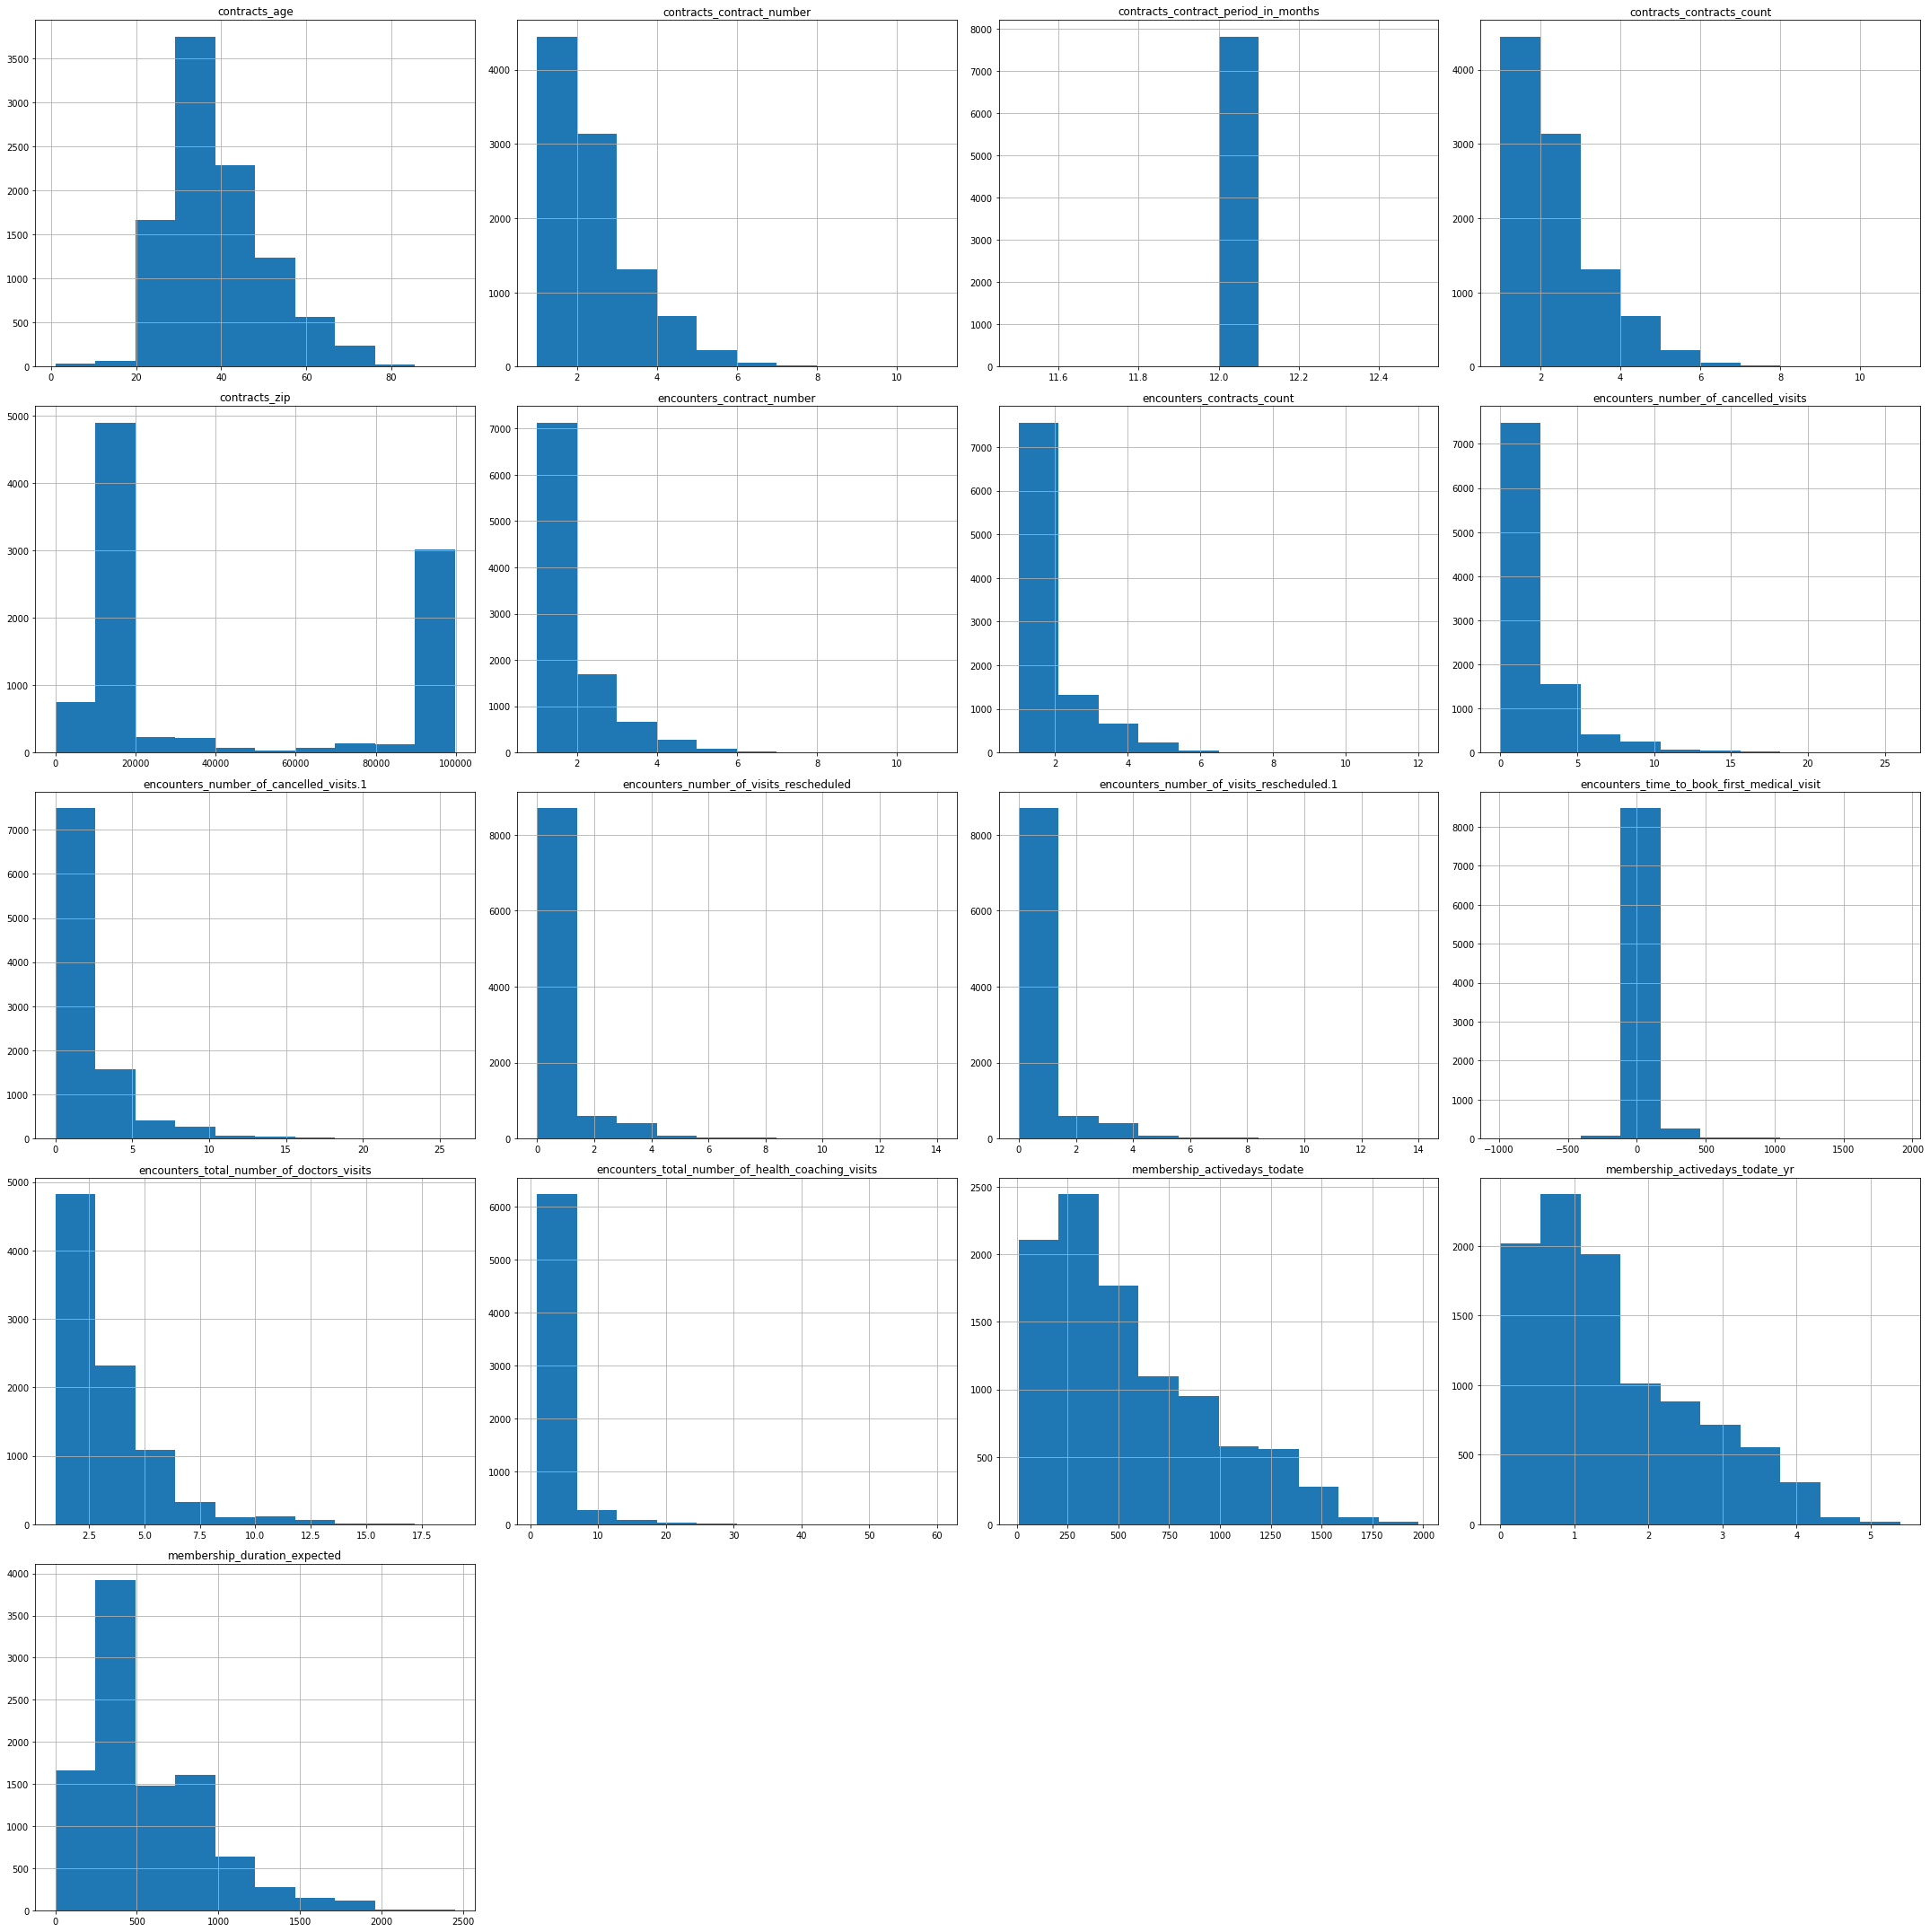

In [12]:
#Lets look at variable distributions
df.hist(figsize=(30,30))
#set a large figsize if you have > 9 variables
plt.tight_layout()
plt.show()

In [13]:
#Lets now look at some summary statistics 
df.describe()

,contracts_age,contracts_zip,contracts_contract_period_in_months,contracts_contract_number,contracts_contracts_count,membership_duration_expected,membership_activedays_todate,membership_activedays_todate_yr,encounters_contracts_count,encounters_contract_number,encounters_total_number_of_doctors_visits,encounters_time_to_book_first_medical_visit,encounters_total_number_of_health_coaching_visits,encounters_number_of_visits_rescheduled,encounters_number_of_cancelled_visits,encounters_number_of_visits_rescheduled.1,encounters_number_of_cancelled_visits.1
count,9864.000000,9541.000000,7817.0,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9863.000000,9863.000000,8880.000000,8880.000000,6641.000000,9863.000000,9863.000000,9863.000000,9863.000000
mean,39.244323,39677.246201,12.0,1.917680,1.917680,569.258719,541.950629,1.485128,1.928014,1.436683,2.961937,31.776126,2.661949,0.512623,1.667850,0.512623,1.667850
std,11.460149,38102.725903,0.0,1.092644,1.092644,365.071086,393.161832,1.077602,1.099717,0.846109,2.318320,97.303749,3.186428,1.158945,2.635958,1.158945,2.635958
min,1.000000,0.000000,12.0,1.000000,1.000000,0.000000,10.000000,0.000000,1.000000,1.000000,1.000000,-990.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,10022.000000,12.0,1.000000,1.000000,365.000000,237.000000,0.600000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,11231.000000,12.0,2.000000,2.000000,425.000000,424.000000,1.200000,2.000000,1.000000,2.000000,7.000000,2.000000,0.000000,1.000000,0.000000,1.000000
75%,45.000000,90066.000000,12.0,2.000000,2.000000,739.000000,793.000000,2.200000,2.000000,2.000000,4.000000,35.000000,3.000000,1.000000,2.000000,1.000000,2.000000
max,95.000000,99821.000000,12.0,11.000000,11.000000,2453.000000,1977.000000,5.400000,12.000000,11.000000,19.000000,1911.000000,60.000000,14.000000,26.000000,14.000000,26.000000


In [14]:
#Lets now create a new datafrom to look at the summary statistics 
df_2 = df.describe()
df_2

,contracts_age,contracts_zip,contracts_contract_period_in_months,contracts_contract_number,contracts_contracts_count,membership_duration_expected,membership_activedays_todate,membership_activedays_todate_yr,encounters_contracts_count,encounters_contract_number,encounters_total_number_of_doctors_visits,encounters_time_to_book_first_medical_visit,encounters_total_number_of_health_coaching_visits,encounters_number_of_visits_rescheduled,encounters_number_of_cancelled_visits,encounters_number_of_visits_rescheduled.1,encounters_number_of_cancelled_visits.1
count,9864.000000,9541.000000,7817.0,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9863.000000,9863.000000,8880.000000,8880.000000,6641.000000,9863.000000,9863.000000,9863.000000,9863.000000
mean,39.244323,39677.246201,12.0,1.917680,1.917680,569.258719,541.950629,1.485128,1.928014,1.436683,2.961937,31.776126,2.661949,0.512623,1.667850,0.512623,1.667850
std,11.460149,38102.725903,0.0,1.092644,1.092644,365.071086,393.161832,1.077602,1.099717,0.846109,2.318320,97.303749,3.186428,1.158945,2.635958,1.158945,2.635958
min,1.000000,0.000000,12.0,1.000000,1.000000,0.000000,10.000000,0.000000,1.000000,1.000000,1.000000,-990.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,10022.000000,12.0,1.000000,1.000000,365.000000,237.000000,0.600000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,11231.000000,12.0,2.000000,2.000000,425.000000,424.000000,1.200000,2.000000,1.000000,2.000000,7.000000,2.000000,0.000000,1.000000,0.000000,1.000000
75%,45.000000,90066.000000,12.0,2.000000,2.000000,739.000000,793.000000,2.200000,2.000000,2.000000,4.000000,35.000000,3.000000,1.000000,2.000000,1.000000,2.000000
max,95.000000,99821.000000,12.0,11.000000,11.000000,2453.000000,1977.000000,5.400000,12.000000,11.000000,19.000000,1911.000000,60.000000,14.000000,26.000000,14.000000,26.000000


In [18]:
#Lets see if there are any duplicate values 
df.duplicated().sum()

0

# NULL VALUES

In [19]:
#Lets now check for NULL values / exlcuding 0  -> this will provide a % of missing values for each feature 
null = df.isna().sum()/len(df)
null[null > 0].sort_values()

encounters_number_of_visits_rescheduled              0.000101
encounters_number_of_cancelled_visits.1              0.000101
encounters_number_of_visits_rescheduled.1            0.000101
encounters_patient_id                                0.000101
encounters_contract_id                               0.000101
encounters_contracts_count                           0.000101
encounters_contract_number                           0.000101
encounters_number_of_cancelled_visits                0.000101
contracts_zip                                        0.032745
encounters_time_to_book_first_medical_visit          0.099757
encounters_first_medical_visit_date_new_             0.099757
encounters_total_number_of_doctors_visits            0.099757
encounters_current_doctor                            0.103508
encounters_last_medical_visit_date_new_              0.123175
psi_person_id_2                                      0.192721
PSI 1                                                0.192721
contract

# OUTLIERS 

In [27]:
#Outliers for CONTINUOUS DATA - AGE 
#Lets first pull out a couple continuous variables
continuous = df[['contracts_age', 'membership_activedays_todate']]
continuous_labels = list(continuous.columns)

In [8]:
#List of all continuous variables
[key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['float64', 'int64']]

['contracts_age',
 'contracts_zip',
 'contracts_contract_period_in_months',
 'contracts_contract_number',
 'contracts_contracts_count',
 'membership_duration_expected',
 'membership_activedays_todate',
 'membership_activedays_todate_yr',
 'encounters_contracts_count',
 'encounters_contract_number',
 'encounters_total_number_of_doctors_visits',
 'encounters_time_to_book_first_medical_visit',
 'encounters_total_number_of_health_coaching_visits',
 'encounters_number_of_visits_rescheduled',
 'encounters_number_of_cancelled_visits',
 'encounters_number_of_visits_rescheduled.1',
 'encounters_number_of_cancelled_visits.1']

In [10]:
df[['contracts_age','contracts_zip','contracts_contract_period_in_months','contracts_contract_number','contracts_contracts_count','membership_duration_expected','membership_activedays_todate','membership_activedays_todate_yr','encounters_contracts_count','encounters_contract_number','encounters_total_number_of_doctors_visits','encounters_time_to_book_first_medical_visit','encounters_total_number_of_health_coaching_visits','encounters_number_of_visits_rescheduled','encounters_number_of_cancelled_visits','encounters_number_of_visits_rescheduled.1','encounters_number_of_cancelled_visits.1']]

,contracts_age,contracts_zip,contracts_contract_period_in_months,contracts_contract_number,contracts_contracts_count,membership_duration_expected,membership_activedays_todate,membership_activedays_todate_yr,encounters_contracts_count,encounters_contract_number,encounters_total_number_of_doctors_visits,encounters_time_to_book_first_medical_visit,encounters_total_number_of_health_coaching_visits,encounters_number_of_visits_rescheduled,encounters_number_of_cancelled_visits,encounters_number_of_visits_rescheduled.1,encounters_number_of_cancelled_visits.1
0,48,10009.0,12.0,2,2,733,324,0.9,2.0,1.0,2.0,5.0,1.0,1.0,2.0,1.0,2.0
1,36,90008.0,12.0,1,1,167,485,1.3,1.0,1.0,2.0,2.0,2.0,0.0,1.0,0.0,1.0
2,32,10003.0,12.0,4,4,1825,1414,3.9,4.0,1.0,6.0,0.0,10.0,0.0,0.0,0.0,0.0
3,40,10028.0,NaN,2,2,731,444,1.2,2.0,1.0,1.0,0.0,NaN,0.0,0.0,0.0,0.0
4,28,10310.0,12.0,4,4,794,380,1.0,4.0,1.0,4.0,10.0,4.0,5.0,7.0,5.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9859,36,90094.0,12.0,1,1,365,883,2.4,1.0,1.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0
9860,55,10025.0,12.0,2,2,426,773,2.1,2.0,1.0,7.0,0.0,4.0,0.0,0.0,0.0,0.0
9861,53,12508.0,12.0,3,3,1393,1164,3.2,3.0,3.0,11.0,0.0,10.0,1.0,0.0,1.0,0.0
9862,47,19115.0,12.0,2,2,806,344,0.9,2.0,1.0,1.0,74.0,NaN,0.0,1.0,0.0,1.0


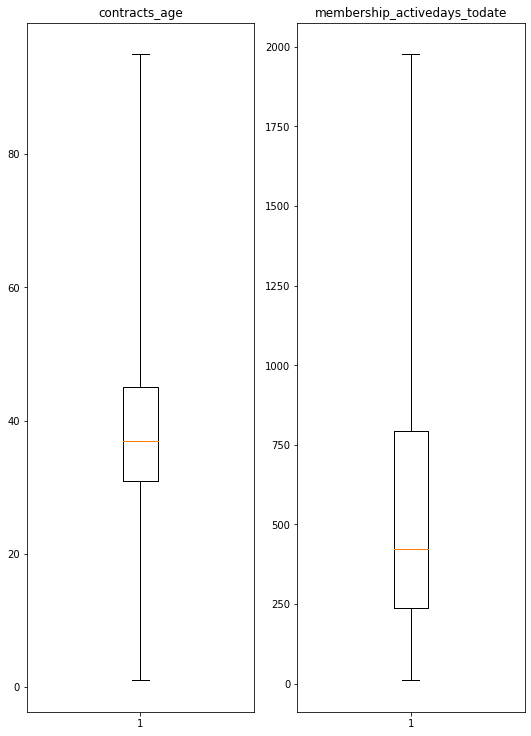

In [26]:
#Now lets create a plot that will take our continuous data and plot it for us
i = 1
plt.figure(figsize=(15,30))
for var in continuous_labels: #plotting boxplot for each variable
   plt.subplot(round(len(continuous_labels),0)/3+3,4,i)
   plt.boxplot(continuous[var],whis=5)
   plt.title(var)
   i+=1
plt.tight_layout()
plt.show()

# NEW FEATURES 

## Lets create a NEW FEATURE - Encounters that is grouped together  // encounters_total_med_human

In [11]:
#Lets create a FUNCTION that dictates how it should look/work
def myencounters(row):
    if row['encounters_total_number_of_doctors_visits'] == 1 :
        return '1 Medical Encounter'
    elif (row['encounters_total_number_of_doctors_visits'] > 1) & (row['encounters_total_number_of_doctors_visits'] <= 3) :
        return '1 to 2 Medical Encounters'
    elif row['encounters_total_number_of_doctors_visits'] > 3 :
        return '4 or more Medical Encounters'

df['encounters_total_med_human'] = df.apply( lambda row : myencounters(row), axis = 1)
df['encounters_total_med_human'] = df['encounters_total_med_human'].fillna('0 Medical Encounters')


In [18]:
df['psi_count_numberical'] = np.random.randint(0,7, df.shape[0])

In [22]:
## Lets create a NEW FEATURE - Completed PSIs // psi_completed_count_group
def psicompletion(row):
    if row['psi_count_numberical'] == 1 :
        return '1 PSI completed'
    elif (row['psi_count_numberical'] == 2) :
        return '2 PSIs completed'
    elif row['psi_count_numberical'] >= 3 :
        return '3 or more PSIs completed'

df['psi_completed_binary_group'] = df.apply( lambda row : psicompletion(row), axis = 1)

In [0]:
# How we check that both of these are now part of our dataset? lets do a list of our columns 
list(df)
# We should see that the last columns of our dataframe now contain those new values

In [23]:
list(df)

['contracts_center_id',
 'contracts_center',
 'contracts_practice_location',
 'contracts_patient_id',
 'contracts_age',
 'contracts_biological_sex',
 'contracts_zip',
 'contracts_joined_practice_date',
 'contracts_contract_start_date',
 'contracts_computed_contract_end_date',
 'contracts_last_day_membership',
 'contracts_plan_type',
 'contracts_contract_id',
 'contracts_contract_period',
 'contracts_contract_period_in_months',
 'contracts_contract_number',
 'contracts_membership_status',
 'contracts_contracts_count',
 'membership_duration_expected',
 'membership_todaysdate',
 'membership_activedays_todate',
 'membership_activedays_todate_yr',
 'encounters_patient_id',
 'encounters_contract_id',
 'encounters_contracts_count',
 'encounters_contract_number',
 'encounters_current_doctor',
 'encounters_total_number_of_doctors_visits',
 'encounters_time_to_book_first_medical_visit',
 'encounters_total_number_of_health_coaching_visits',
 'encounters_number_of_visits_rescheduled',
 'encounters